# Классификация

**Что делает классификация?**

Разделяет объекты по заранее известному признаку. Носки по цветам, документы по языкам, музыку по жанрам

Сегодня различные методы классификации используют для решения кучи задач, например - 

* Спам-фильтры
* Определение языка
* Поиск похожих документов
* Анализ тональности
* Распознавание рукописных букв и цифр
* Определение подозрительных транзакций

![image.png](https://media.geeksforgeeks.org/wp-content/uploads/classification-1.png)

Хорошая статья про классификацию и не только лежит [тут](https://vas3k.ru/blog/machine_learning/?fbclid=IwAR1yU_u4RquJ0aNLYdH-DnzkyoxCI-XLK8_Ktu05kXvgKUV1e_amNN-gFaA)

### Итак, пришло время практики!

Работаем по уже хорошо отработанной тактике

In [2]:
from sklearn.model_selection import train_test_split # функция чтобы разбить данные на трейн и тест
from sklearn.linear_model import LogisticRegression # наша модель для классификации

In [3]:
from sklearn.datasets import load_breast_cancer, load_iris # Заберем два датасета
breast_cancer = load_breast_cancer()
print(breast_cancer.DESCR) 

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

Теперь задаем Y (то что будем предсказывать) и Х (признаки, с помощью которых будем предсказывать)

In [4]:
Y = breast_cancer.target # X - признаки по которым мы будем предсказывать рак
X = breast_cancer.data # Наша целевая переменная, 0 если рака нет, 1 если есть

Мы доросли до той стадии, когда нам уже не нужно что-то знать о признаках

Здесь мы можем просто брать готовые данные и загружать их в наши модели

In [5]:
# Разделяем на обучающую и тестовую выборки:

X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size = 0.3, random_state=123)

In [6]:
# Выбираем модель:

model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Как оценить качество классификации?

Можно вычислить метрики, которые вы уже знаете:

In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

Y_predicted = model.predict(X_val)
print(accuracy_score(Y_val,Y_predicted))

0.9824561403508771


Вычислите остальные метрики:

In [8]:
print(precision_score(Y_val,Y_predicted))
print(recall_score(Y_val,Y_predicted))

0.9807692307692307
0.9902912621359223


## Задание

Решите задачу классификации и рассчитайте метрику accuracy, precision, recall для нового датасета:

In [3]:
from sklearn.datasets import load_iris 

iris = load_iris()
print(iris.DESCR) 

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [5]:
Y = iris.target
X = iris.data

print(X.shape)
print(Y.shape)

(150, 4)
(150,)


In [ ]:
# YOUR CODE

## Визуализация

![alt text](https://media.giphy.com/media/YBIxUwCdysgaJgkmsP/giphy.gif "Гифка1")

На самом деле любой базовый анализ данных бесполезен без красивых картиночек. Именно на красивых графиках стоит показывать результаты вашей работы, именно по ним люди будут понимать что хорошего вы сделали

In [10]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

## Библиотека Matplotlib 
 - <a href="http://http://matplotlib.org/">matplotlib</a> - основная библиотека для базовой визуализации данных
 
 
`Scatter` рисует набор точек. Первый аргумент - координаты точек по оси X, второй аргумент - координаты по оси Y 

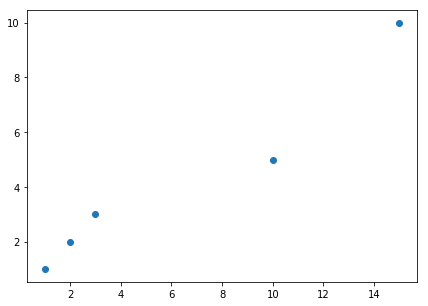

In [11]:
# Создание графика из точек - scatter

plt.figure(figsize=[7, 5]) # figsize - размер графика, [ширина, высота] в дюймах

plt.scatter([1, 2, 3, 10, 15], [1, 2, 3, 5, 10]) # Первая точка (1, 1), вторая (2, 2), последняя (15, 10)

plt.show() # рисует сам график и выводит его нам в тетрадку

Если хочется не просто нарисовать точки, а еще и соединить их, то стоит использовать функцию `plt.plot`

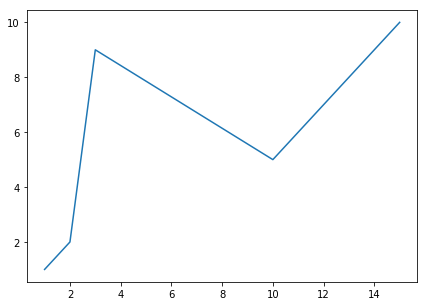

In [12]:
# Создание прямой из точек - plot

plt.figure(figsize=[7, 5]) # figsize - размер графика, [ширина, высота] в дюймах
plt.plot([1, 2, 3, 10, 15], [1, 2, 9, 5, 10]) # Первая точка (1, 1), вторая (2, 2), последняя (15, 10)
plt.show() # рисует сам график и выводит его нам в тетрадку

Делать график без заголовков - плохая практика. Добавить заголовок к графику можно с помощью команды `plt.title`

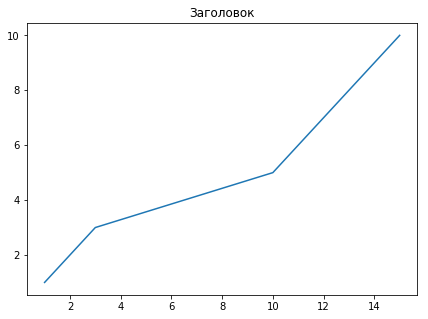

In [13]:
# Создание прямой из точек - plot

plt.figure(figsize=[7, 5]) # figsize - размер графика, [ширина, высота] в дюймах
plt.plot([1, 2, 3, 10, 15], [1, 2, 3, 5, 10]) # Первая точка (1, 1), вторая (2, 2), последняя (15, 10)
plt.title('Заголовок')
plt.show() # рисует сам график и выводит его нам в тетрадку

### Красивое рисование графиков

#### Оформление
- Заголовок области рисования -> plt.title()
- Подпись оси абсцисс OX -> plt.xlabel()
- Подпись оси ординат OY -> plt.ylabel()
- Деления на оси абсцисс OX -> plt.xticks()
- Деления на оси ординат OY -> plt.yticks()
- Разбитие на красивую сеточку -> plt.grid()

#### Подписи
- Легенда -> plt.legend()

Перед тем как вызывать легенду, убедитесь что вы подписали графики - передали аргумент `label` в `plt.plot` или `plt.scatter` 


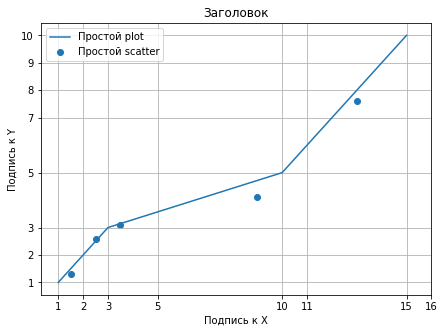

In [14]:
# Создание прямой из точек - plot

plt.figure(figsize=[7, 5]) 
plt.plot([1, 2, 3, 10, 15], [1, 2, 3, 5, 10], label='Простой plot') # label - как подпишется график
plt.scatter([1.5, 2.5, 3.5, 9, 13], [1.3, 2.6, 3.1, 4.1, 7.6], label='Простой scatter') # label - как подпишется график

plt.title('Заголовок')

plt.xlabel('Подпись к X') # в скобках вводим текст, который должен появиться в качестве подписи оси х
plt.ylabel('Подпись к Y') # в скобках вводим текст, который должен появиться в качестве подписи оси y

plt.xticks([1, 2, 3, 5, 10, 11, 15, 16]) # то где на графике, на оси X будут точечки
plt.yticks([1, 2, 3, 5, 7, 8, 9, 10]) # то где на графике, на оси Y будут точечки
plt.legend()
plt.grid()

plt.show() 

А еще можно изменить размеры текста у подписей осей!

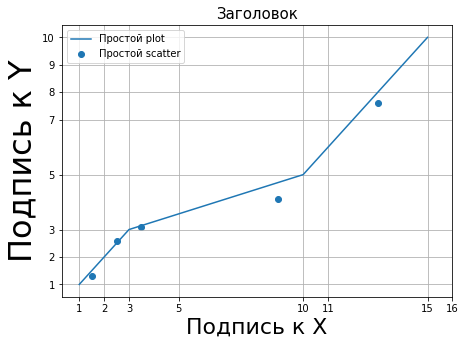

In [15]:
# Создание прямой из точек - plot

plt.figure(figsize=[7, 5]) 
plt.plot([1, 2, 3, 10, 15], [1, 2, 3, 5, 10], label='Простой plot') 
plt.scatter([1.5, 2.5, 3.5, 9, 13], [1.3, 2.6, 3.1, 4.1, 7.6], label='Простой scatter') 

plt.title('Заголовок', fontsize=15)

plt.xlabel('Подпись к X', fontsize=22)
plt.ylabel('Подпись к Y', fontsize=32)

plt.xticks([1, 2, 3, 5, 10, 11, 15, 16])
plt.yticks([1, 2, 3, 5, 7, 8, 9, 10])
plt.legend()
plt.grid()

plt.show() 

Подробнее про настройку деления осей

За деления осей отвечают xticks и yticks

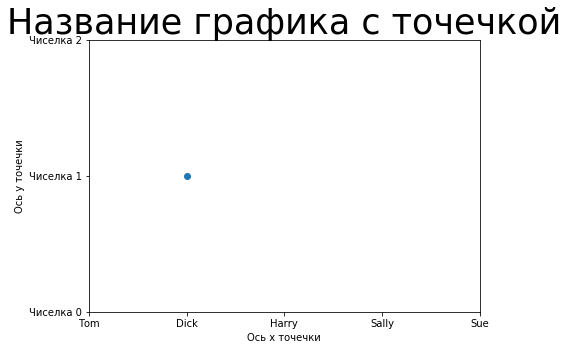

In [16]:
plt.figure(figsize=[7, 5])   # Создание объекта Figure
plt.scatter([1.0], [1.0])   # scatter - метод для нанесения маркера в точке (1.0, 1.0)
plt.xlabel('Ось х точечки')# в скобках в кавычках вводим текст, который должен появиться в качестве подписи оси х
plt.ylabel('Ось y точечки')# в скобках в кавычках вводим текст, который должен появиться в качестве подписи оси у
plt.title('Название графика с точечкой',  fontsize = 35)
plt.xticks(np.arange(5), ('Tom', 'Dick', 'Harry', 'Sally', 'Sue'))
# итак, что у нас происходит сверху? сначала мы сказали, что у нас вся ось х будет от 0 до 4
# 5 не будет, так как в питоне последняя циферка не включительно
# значит, сказали, что вся ось от 0 до 4
# потом сказали, что хотим, чтобы она была подписана не чиселками 0,1,2,3,4,
# а именами 'Tom', 'Dick', 'Harry', 'Sally', 'Sue'
plt.yticks(np.arange(3), ('Чиселка 0', 'Чиселка 1', 'Чиселка 2'))
# с осью y сделали примерно то же самое
plt.show()

Чуть подробнее про то как вообще рисуются графики в plt

Когда вы делаете `plt.figure`, plt выделяет вам один большой график, в который вы можете добавлять сколько угодно `scatter` и `plot` графиков, менять подписи, грифты, заголовки, что угодно. Когда вы вызываете `plt.show`, plt отрисовывает этот большой график и забывает что он вообще был.

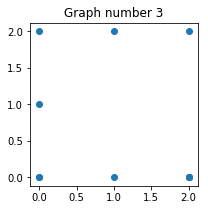

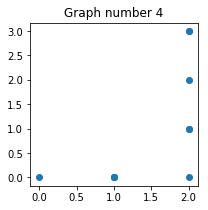

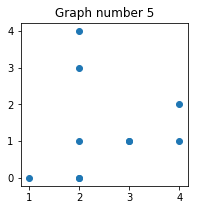

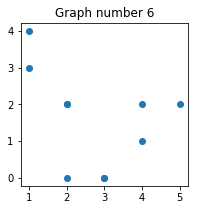

In [17]:
for i in range(3, 7):
    plt.figure(figsize=[3, 3])
    plt.title('Graph number ' + str(i))
    plt.scatter(np.random.randint(0, i, 10), np.random.randint(0, i, 10)) 
    # np.random.randint(0, i, 10) выдаст np.array из 10 случайных чисел от 0 до i
    plt.show() # рисует сам график и выводит его нам в тетрадку

Кстати, вам понадобятся названия цветов:

![alt text](https://i.stack.imgur.com/lFZum.png "Цвета")

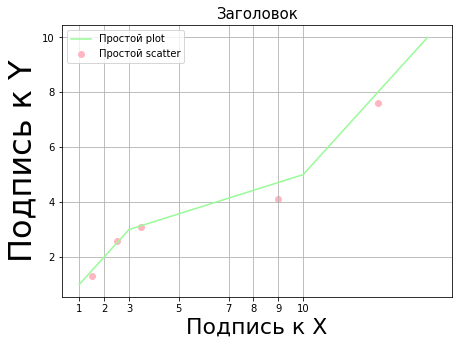

In [18]:
plt.figure(figsize=[7, 5]) 
plt.plot([1, 2, 3, 10, 15], [1, 2, 3, 5, 10], label='Простой plot', c='palegreen') 
plt.scatter([1.5, 2.5, 3.5, 9, 13], [1.3, 2.6, 3.1, 4.1, 7.6], label='Простой scatter', c='lightpink') 
plt.title('Заголовок', fontsize=15)

plt.xlabel('Подпись к X', fontsize=22)
plt.ylabel('Подпись к Y', fontsize=32)

plt.xticks([1, 2, 3, 5, 10, 11, 15, 16])
plt.xticks([1, 2, 3, 5, 7, 8, 9, 10])
plt.legend()
plt.grid()

plt.show() 

### Виды графиков:

Очень важно выбрать нужный тип визуализации! Можно использовать для этого этот путеводитель по графикам, давайте повторим основные типы и сферы их использования:

![alt text](http://bigdata.black/wp-content/uploads/2016/04/best-chart-1.png "Гифка1")

Задание: построить график ломаной прямой (plot), подписать оси, добавить заголовок

In [22]:
x = np.array([1, 2, 5, 10, 11, 14])
y = x**4

# YOUR CODE 

plt.show()

Задание: построить точечный график, подписать оси, добавить заголовок

In [23]:
plt.figure(figsize=[7, 5])

# YOUR CODE

plt.show()

<Figure size 504x360 with 0 Axes>

#### Столбчатая диаграмма
- plt.bar()

<b> Зачем: </b> Можно продемонстрировать распределение значений по категориям, сравнивать их между собой.

Попробуем отрисовать сразу два графика на одном рисунке:

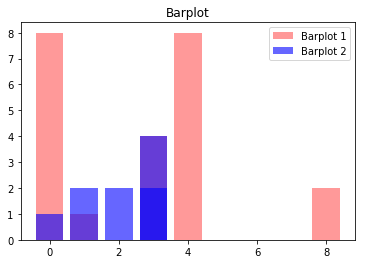

In [54]:
X = [1,0,8,3,4]
Y = [1,8,2,4,8]

X2 = [2, 3, 0, 3, 1]
Y2 = [2, 4, 1, 2, 2]


plt.bar(X,Y, label="Barplot 1", color='r', alpha=0.4) # Параметр alpha отвечает за "прозрачность"
plt.bar(X2,Y2, label="Barplot 2", color='b', alpha=0.6)
plt.title('Barplot')
plt.legend()

plt.show()

Попробуем посмотреть другие варианты оформления (а заодно вспомним про циклы): с помощью дополнительного условия можно автоматически перекрашивать часть столбцов по вашему усмотрению.

x ->  [0 1 2 3 4] 
y ->  [-0.10150275  1.43870792  0.16270086  0.22083908  0.47064445]


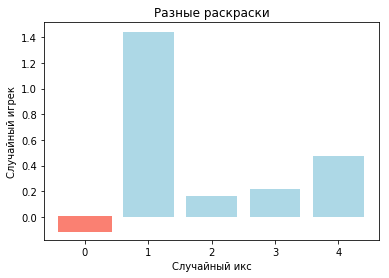

In [52]:
x = np.arange(5)
y = np.random.randn(5)

print('x -> ', x, '\ny -> ', y)

vert_bars = plt.bar(x, y, color='lightblue')

# Можно покрасить часть столбцов в другой цвет
for bar, height in zip(vert_bars, y):
    if height < 0:
        bar.set(edgecolor='darkred', color='salmon', linewidth=3)
        
plt.title('Разные раскраски')

plt.xlabel('Случайный икс')
plt.ylabel('Случайный игрек')

plt.show()

#### Круговая диаграмма
- plt.pie()

<b>Зачем: </b> С помощью круговой диаграммы удобно показывать, какую часть от целого занимает категория переменной.

In [25]:
# Задайте вектор, который будет содержать количество часов, которое Вы тратите на сон, еду, учебу/работу и развлечения (всего 4 значения)
slices = # YOUR CODE

plt.figure(figsize=(10, 10))

# Labels
activities = ['Сон','Еда','Учеба/Работа','Развлечения']

#Задайте список из 4 цветов:
cols = ['red', 'salmon', 'g', 'blue']
plt.pie(slices, labels=activities, colors=cols)

plt.title("Моя сложная жизнь")

plt.show()

Можно отдельно задать параметр explode, который будет показывать насколько нужно "взорвать" каждый кусочек от центра

In [ ]:
# Задайте вектор, который будет содержать количество часов, которое Вы тратите на сон, еду, учебу/работу и развлечения (всего 4 значения)
slices = # YOUR CODE

plt.figure(figsize=(10, 10))

# Labels
activities = ['Сон','Еда','Учеба/Работа','Развлечения']
explode = [0.3, 0, 0.1, 0.4]

#Задайте список из 4 цветов:
cols = ['red', 'salmon', 'g', 'blue']
plt.pie(slices, labels=activities, colors=cols, explode=explode, shadow=True)

plt.title("Моя сложная жизнь")

plt.show()

#### Гистограмма
- plt.hist() - гистограмма

<b> Зачем: </b> Можно показать распределение объектов по частоте их появления.


По оси x отложены интервалы значений, а по у количество наблюдений в данном интервале.

Text(0, 0.5, 'Частота')

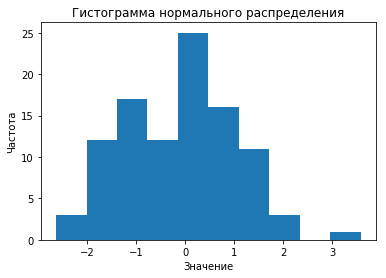

In [46]:
sample = np.random.normal(size=100)     #1000 значений из нормального распределения
plt.hist(sample)               
plt.title("Гистограмма нормального распределения")
plt.xlabel("Значение")
plt.ylabel("Частота")

Чем больше данных, там глаже становится наша гистограмма

Text(0, 0.5, 'Частота')

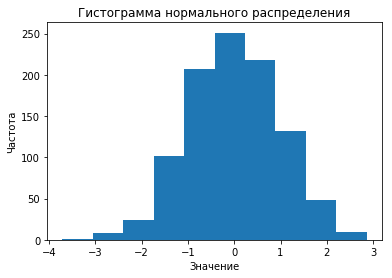

In [48]:
sample = np.random.normal(size=1000)     #1000 значений из нормального распределения
plt.hist(sample)               
plt.title("Гистограмма нормального распределения")
plt.xlabel("Значение")
plt.ylabel("Частота")

По умолчанию гистограмма рисует всего 10 бинов. Этого обычно не хватает и гистограмма получается очень "дерганной"

Text(0, 0.5, 'Частота')

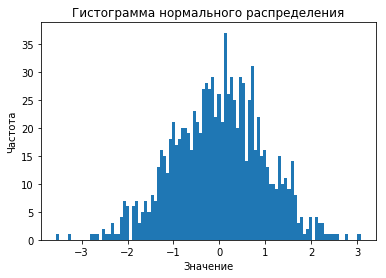

In [49]:
sample = np.random.normal(size=1000)     #1000 значений из нормального распределения
plt.hist(sample, bins=100)               
plt.title("Гистограмма нормального распределения")
plt.xlabel("Значение")
plt.ylabel("Частота")

#### Boxplot (ящик с усами)

- plt.boxplot() - гистограмма

Один из самых информативных графиков для демонстрации основного характера выборки, на иллюстрации ниже можно видеть, как интерпретировать данный график:

![alt text](https://miro.medium.com/max/18000/1*2c21SkzJMf3frPXPAR_gZA.png "Боксплот")

Видно, что основная часть выборки (25 - 75 персентиль) должна попадать в центральный "ящик"

Задание: Построить боксплот по сгенерированной для гистограммы выборке

Text(0, 0.5, 'Частота')

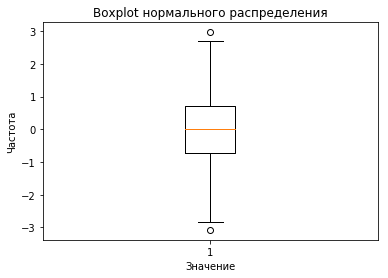

In [76]:
sample = np.random.normal(size=(1000))     #1000 значений из нормального распределения
plt.boxplot(sample)               
plt.title("Boxplot нормального распределения")
plt.xlabel("Значение")
plt.ylabel("Частота")

Можно рисовать много ящиков. Для этого в plt.boxplot нужно подать двумерный массив (таблицу), для каждого столбца нарисуется свой ящик

Text(0, 0.5, 'Частота')

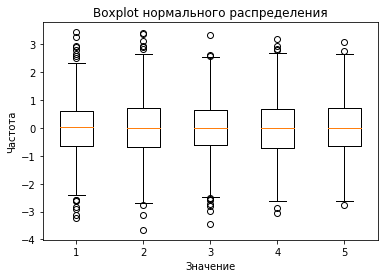

In [26]:
sample = np.random.normal(size=(1000, 5))     #1000 значений из нормального распределения, 5 столбцов
plt.boxplot(sample)               
plt.title("Boxplot нормального распределения")
plt.xlabel("Значение")
plt.ylabel("Частота")

### Несколько графиков в одном

Скорее всего, когда нибудь, вам понадобится вывести несколько графиков на одно поле <br />
Для этого можно использовать функцию subplots: <br />
`fig, axes = plt.subplots(nrows=2, ncols=2, figsize = (width, height))`

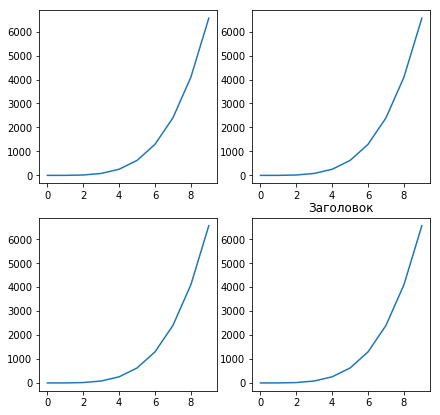

In [56]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize = (7, 7)) # Мы задали 4 области для графика: 2 сверху и 2 снизу
x = np.arange(10)
y = x**4
axes[0, 0].plot(x,y) #График пояится слева сверху
axes[0, 1].plot(x,y)
axes[1, 0].plot(x,y)
axes[1, 1].plot(x,y)

plt.title('Заголовок')

plt.show()

#### Задание: 

Постойте 4 осмысленные функции y от x и нарисуйте их на одном графике (как в предыдущем задании)

In [57]:
# YOUR CODE